# **Implementation and optimization of the mean-timer technique in drift tube detectors**
##### Laboratory of Computational Physics project
##### AY 2021/2022 University of Padua

#### *Students*: Barone Francesco Pio, Valenti Lorenzo, Nagaro Gianmarco, Ninni Daniele

### **Appendix 1A** - run on larger dataset: RUN_0262

In [1]:
from bin.plotters import plot_event  # import the plotter functions
from bin.plotters import plot_event_from_dataframe
from bin.data_selection import *     # import the preprocessing functions
from bin.meantimers import *         # import the meantimers functions

import pandas as pd
import numpy as np
import math
from scipy import stats
import seaborn as sns

In [2]:
run_files =  ['data_000000.txt','data_000001.txt','data_000002.txt','data_000003.txt',
              'data_000004.txt','data_000005.txt','data_000006.txt']         
run_pwd = '/data/Run000262/'

collective_file = '/home/lab/dat/262_all_meantimers.txt'

collect = []

for file in run_files:
    print(f' > processing {file}')
    data = pd.read_csv( run_pwd + file, sep=",")
    data = preprocess_dataset(data)
    no_triggers = data[ data.trigger == 0 ] 
    evs, _ = enhanced_close_hit_clustering(no_triggers, keep_rejected = False)
    events = export_events_to_dataframe(evs) 
    
    mt = meantimer(events)
    
    del events
    del evs
    del data
    del no_triggers
    collect.append(mt)

print(len(collect))

 > processing data_000000.txt
 > processing data_000001.txt
 > processing data_000002.txt
 > processing data_000003.txt
 > processing data_000004.txt
 > processing data_000005.txt
 > processing data_000006.txt
7


In [3]:
collective = pd.concat(collect, ignore_index = True)
collective.reset_index(drop=True)
collective

,L1_HIT,L1_TIME,L1_CELL,L2_HIT,L2_TIME,L2_CELL,L3_HIT,L3_TIME,L3_CELL,L4_HIT,...,PATTERN,ANGLE,L1_DRIFT,L1_X,L2_DRIFT,L2_X,L3_DRIFT,L3_X,L4_DRIFT,L4_X
0,5076,2.207774e+09,0,5074,2.207774e+09,0,5075,2.207774e+09,0,5072,...,LRLR,-8.9732,166.562500,-8.968750,189.062500,10.180288,239.062500,-12.872596,109.062500,5.872596
1,<NA>,NaN,<NA>,8354,3.655548e+09,0,8356,3.655548e+09,0,8355,...,_RLR,20.5313,NaN,NaN,22.708333,1.222756,276.875000,-14.908654,203.541667,10.959936
2,<NA>,NaN,<NA>,9788,4.305668e+09,0,9790,4.305668e+09,0,9789,...,_RLR,22.668,NaN,NaN,22.500000,1.211538,266.666667,-14.358974,224.166667,12.070513
3,<NA>,NaN,<NA>,12493,5.527147e+09,0,12495,5.527148e+09,0,12494,...,_RLR,12.457,NaN,NaN,55.416666,2.983974,281.250000,-15.144231,162.083333,8.727564
4,18868,8.472991e+09,0,18867,8.472991e+09,0,<NA>,NaN,<NA>,18866,...,LR_R,10.367,275.833333,-14.852564,158.333333,8.525641,NaN,NaN,246.666666,13.282051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630159,179987,2.919697e+10,15,179991,2.919697e+10,15,179986,2.919697e+10,15,179988,...,LRLR,2.86492,76.875000,-4.139423,330.208332,17.780449,47.708332,-2.568910,349.375000,18.812500
630160,182071,2.937186e+10,15,182065,2.937186e+10,15,182069,2.937186e+10,15,182068,...,LRLR,3.1609,365.416668,-19.676282,34.583336,1.862180,342.083336,-18.419872,64.583336,3.477564
630161,195034,3.180185e+10,15,195035,3.180186e+10,15,195033,3.180185e+10,15,<NA>,...,LRL_,0.988735,45.833336,-2.467949,348.333336,18.756410,37.500000,-2.019231,NaN,NaN
630162,<NA>,NaN,<NA>,197402,3.286608e+10,15,197404,3.286608e+10,15,197403,...,_RLR,17.2575,NaN,NaN,29.166668,1.570513,285.833332,-15.391026,179.166668,9.647436


In [4]:
collective.to_csv(collective_file, index=False)
del collective

coll = pd.read_csv(collective_file, sep=",")

### plot random events

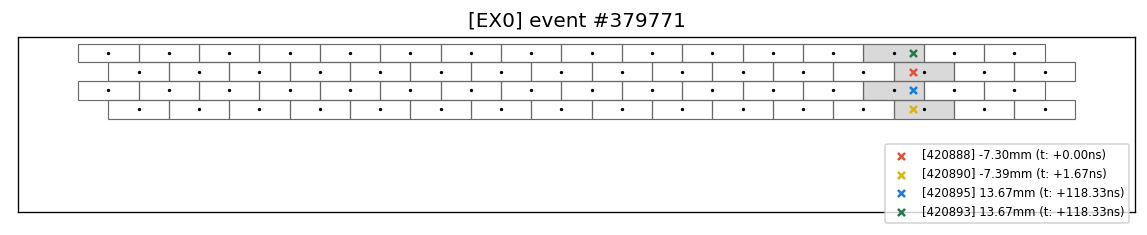

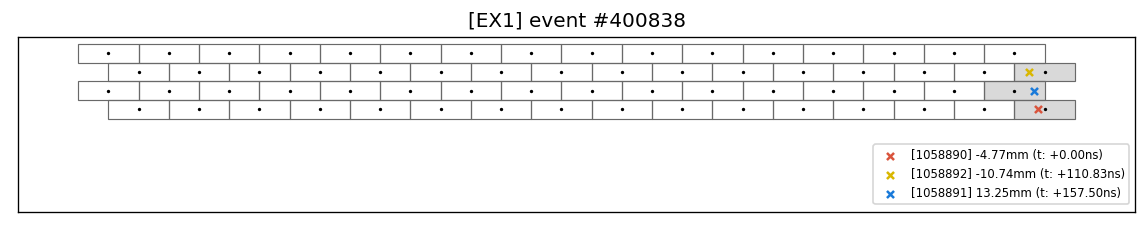

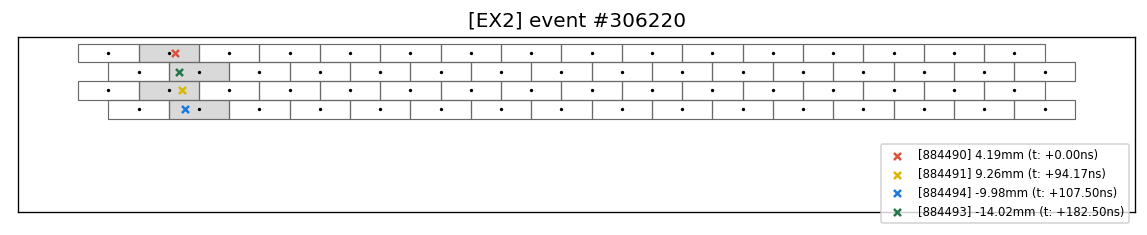

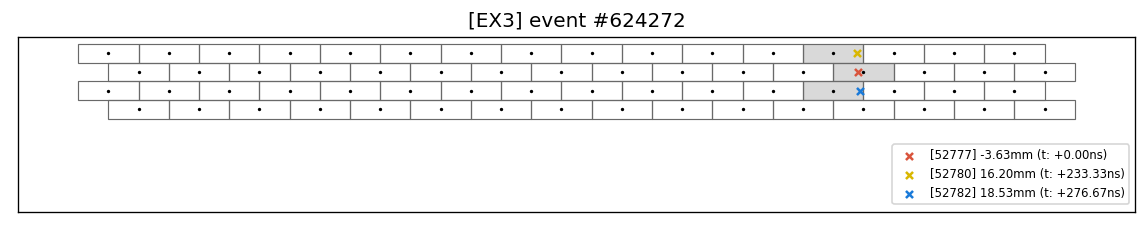

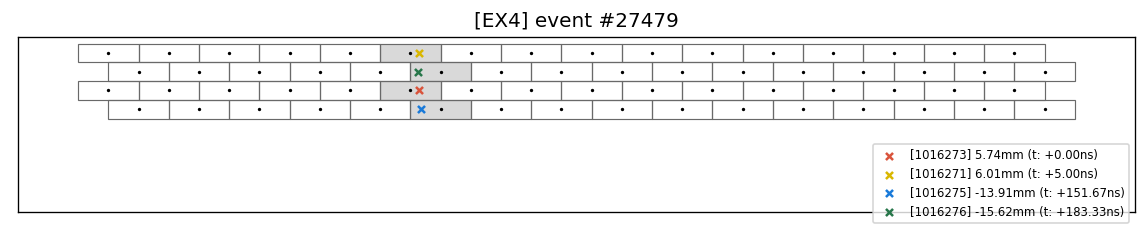

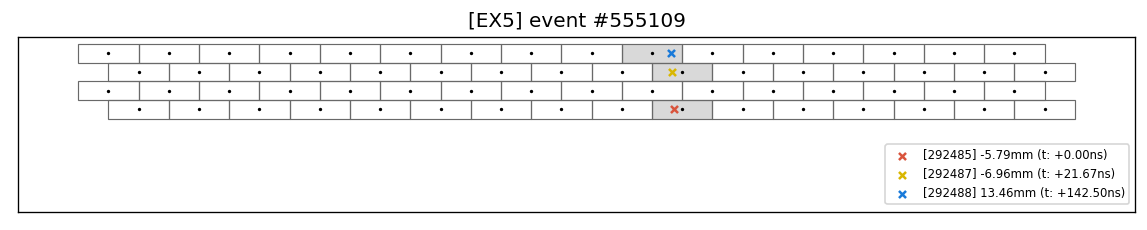

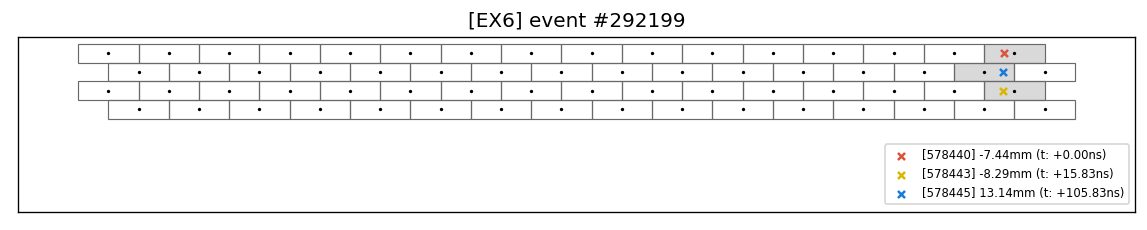

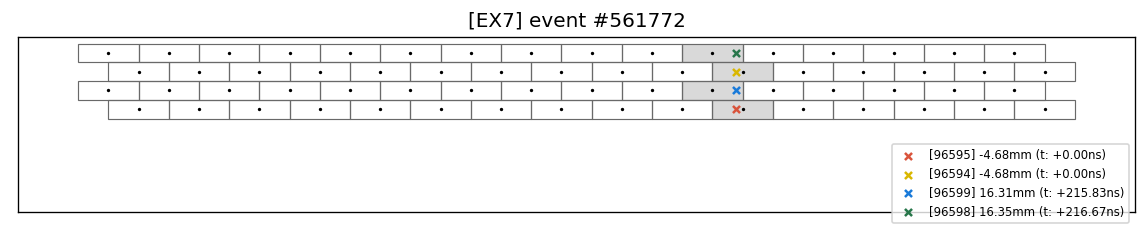

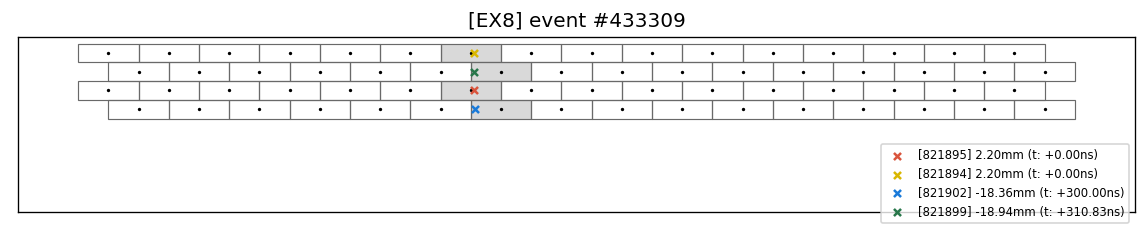

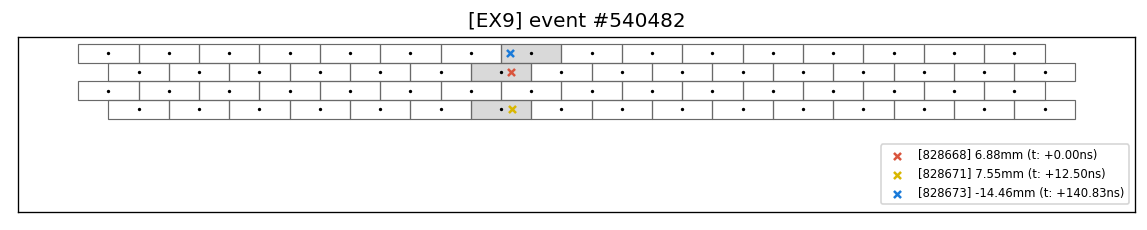

In [5]:
for i in range(10):
    y = np.random.randint(0, len(coll))
    plot_event_from_dataframe(coll, index = y, title = f'[EX{i}] event #{y}');

## Statistics

#### Distributions of the drift times

In [6]:
events = coll
events[events['DETECTOR'] == 1]

,L1_HIT,L1_TIME,L1_CELL,L2_HIT,L2_TIME,L2_CELL,L3_HIT,L3_TIME,L3_CELL,L4_HIT,...,PATTERN,ANGLE,L1_DRIFT,L1_X,L2_DRIFT,L2_X,L3_DRIFT,L3_X,L4_DRIFT,L4_X
0,5076.0,2.207774e+09,0.0,5074.0,2.207774e+09,0.0,5075.0,2.207774e+09,0.0,5072.0,...,LRLR,-8.973195,166.562500,-8.968750,189.062500,10.180288,239.062500,-12.872596,109.062500,5.872596
1,NaN,NaN,NaN,8354.0,3.655548e+09,0.0,8356.0,3.655548e+09,0.0,8355.0,...,_RLR,20.531272,NaN,NaN,22.708333,1.222756,276.875000,-14.908654,203.541667,10.959936
2,NaN,NaN,NaN,9788.0,4.305668e+09,0.0,9790.0,4.305668e+09,0.0,9789.0,...,_RLR,22.667994,NaN,NaN,22.500000,1.211538,266.666667,-14.358974,224.166667,12.070513
3,NaN,NaN,NaN,12493.0,5.527147e+09,0.0,12495.0,5.527148e+09,0.0,12494.0,...,_RLR,12.456994,NaN,NaN,55.416666,2.983974,281.250000,-15.144231,162.083333,8.727564
4,18868.0,8.472991e+09,0.0,18867.0,8.472991e+09,0.0,NaN,NaN,NaN,18866.0,...,LR_R,10.366989,275.833333,-14.852564,158.333333,8.525641,NaN,NaN,246.666666,13.282051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629213,190963.0,3.019916e+10,15.0,190960.0,3.019916e+10,15.0,190962.0,3.019916e+10,15.0,190956.0,...,LRLR,-3.554848,213.333332,-11.487179,166.666664,8.974359,238.333332,-12.833333,131.666664,7.089743
629214,191037.0,3.021250e+10,15.0,191044.0,3.021250e+10,15.0,191039.0,3.021250e+10,15.0,191042.0,...,LRLR,-4.095326,84.895832,-4.571314,279.062500,15.026442,128.229164,-6.904647,253.229164,13.635417
629215,199539.0,3.384015e+10,15.0,199537.0,3.384015e+10,15.0,199536.0,3.384015e+10,15.0,199540.0,...,LRLR,13.395990,255.833332,-13.775641,189.166664,10.185897,143.333332,-7.717949,306.666664,16.512820
629216,200883.0,3.440836e+10,15.0,200880.0,3.440836e+10,15.0,200882.0,3.440836e+10,15.0,200879.0,...,LRLR,0.741459,331.354164,-17.842147,55.520828,2.989583,331.354164,-17.842147,68.020828,3.662660


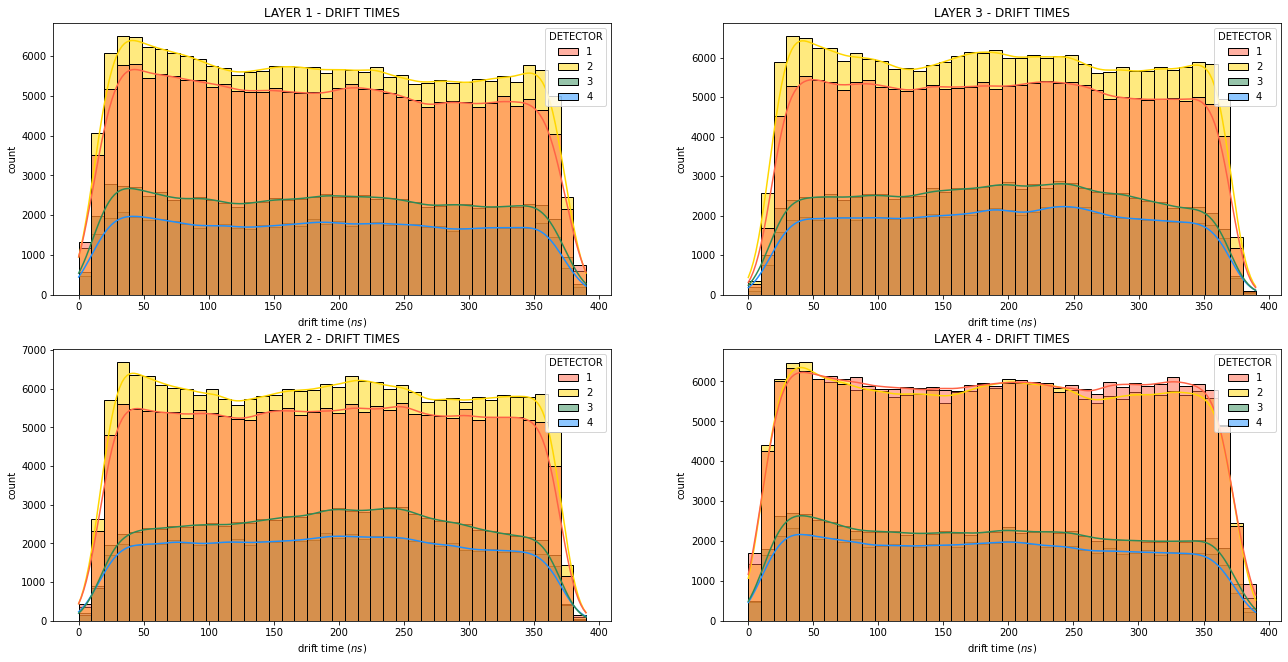

In [7]:
cmap = ['tomato', 'gold', 'seagreen', 'dodgerblue']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(22, 11))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        layer = str(i+2*j+1)
        plot = sns.histplot(data=events, x='L'+layer+'_DRIFT', hue='DETECTOR', stat='count', bins=40, kde=True, palette=cmap, ax=ax[i][j])
        plot.set(title='LAYER '+layer+' - DRIFT TIMES', xlabel='drift time $(ns)$', ylabel='count')

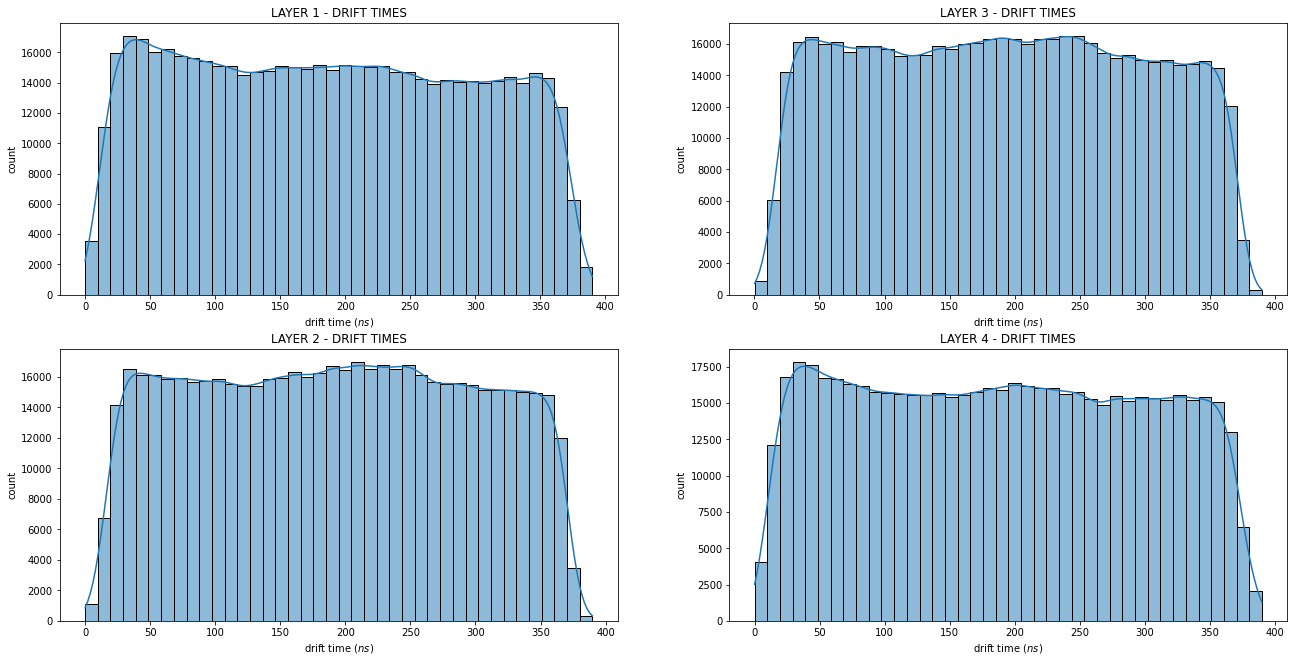

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(22, 11))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        layer = str(i+2*j+1)
        plot = sns.histplot(data=events, x='L'+layer+'_DRIFT', stat='count', bins=40, kde=True, ax=ax[i][j])
        plot.set(title='LAYER '+layer+' - DRIFT TIMES', xlabel='drift time $(ns)$', ylabel='count')

#### Distributions of the crossing angles

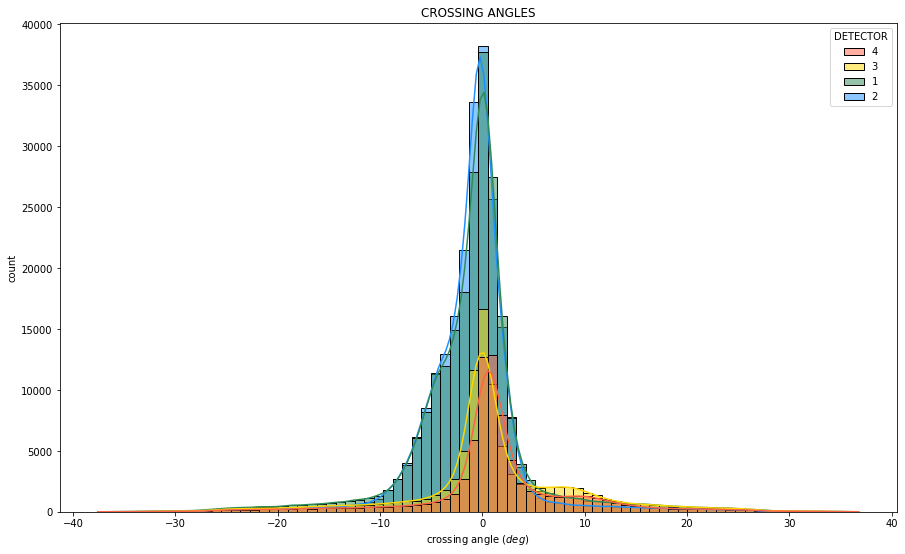

In [9]:
fig, ax = plt.subplots(figsize=(15, 9))
plot = sns.histplot(data=events, x='ANGLE', hue='DETECTOR', hue_order=[4, 3, 1, 2], stat='count', bins=80, kde=True, palette=cmap, ax=ax)
plot.set(title='CROSSING ANGLES', xlabel='crossing angle $(deg)$', ylabel='count')
plt.show()

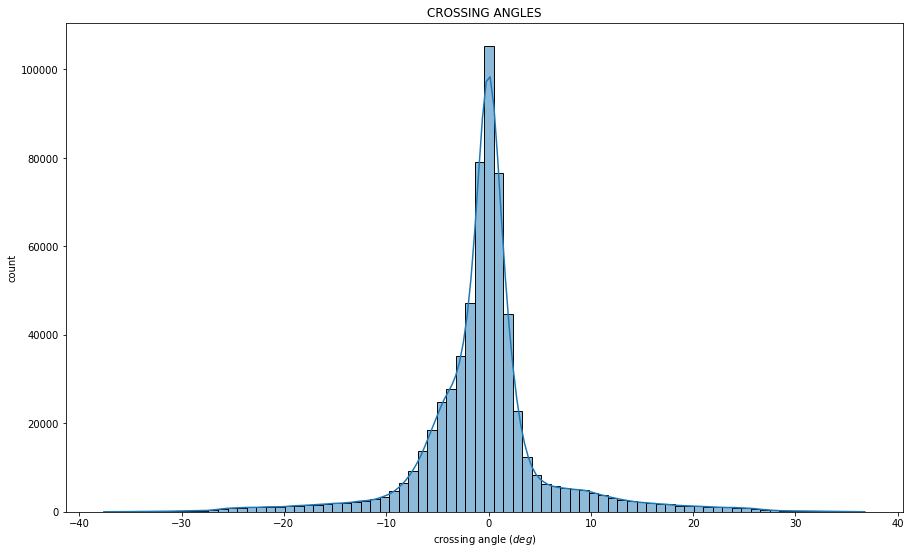

In [10]:
fig, ax = plt.subplots(figsize=(15, 9))
plot = sns.histplot(data=events, x='ANGLE', stat='count', bins=80, kde=True, ax=ax)
plot.set(title='CROSSING ANGLES', xlabel='crossing angle $(deg)$', ylabel='count')
plt.show()

End of file.